# `os.path` VS `pathlib`

1. `os.path`路径操作函数管理比较混乱，有的是导入 `os`, 有的又是在 `os.path` 当中，而新的用法统一可以用 `pathlib` 管理。
2. `os.path`在处理不同操作系统 win，mac 以及 linux 之间很吃力。换了操作系统常常要改代码，还经常需要进行一些额外操作。
3. `os.path`主要是函数形式，返回的数据类型通常是字符串。但是路径和字符串并不等价，所以在使用 `os` 操作路径的时候常常还要引入其他类库协助操作。`pathlib`是面向对象，处理起来更灵活方便。
4. `pathlib` 简化了很多操作，用起来更轻松。

# Python `pathlib` cheatsheet

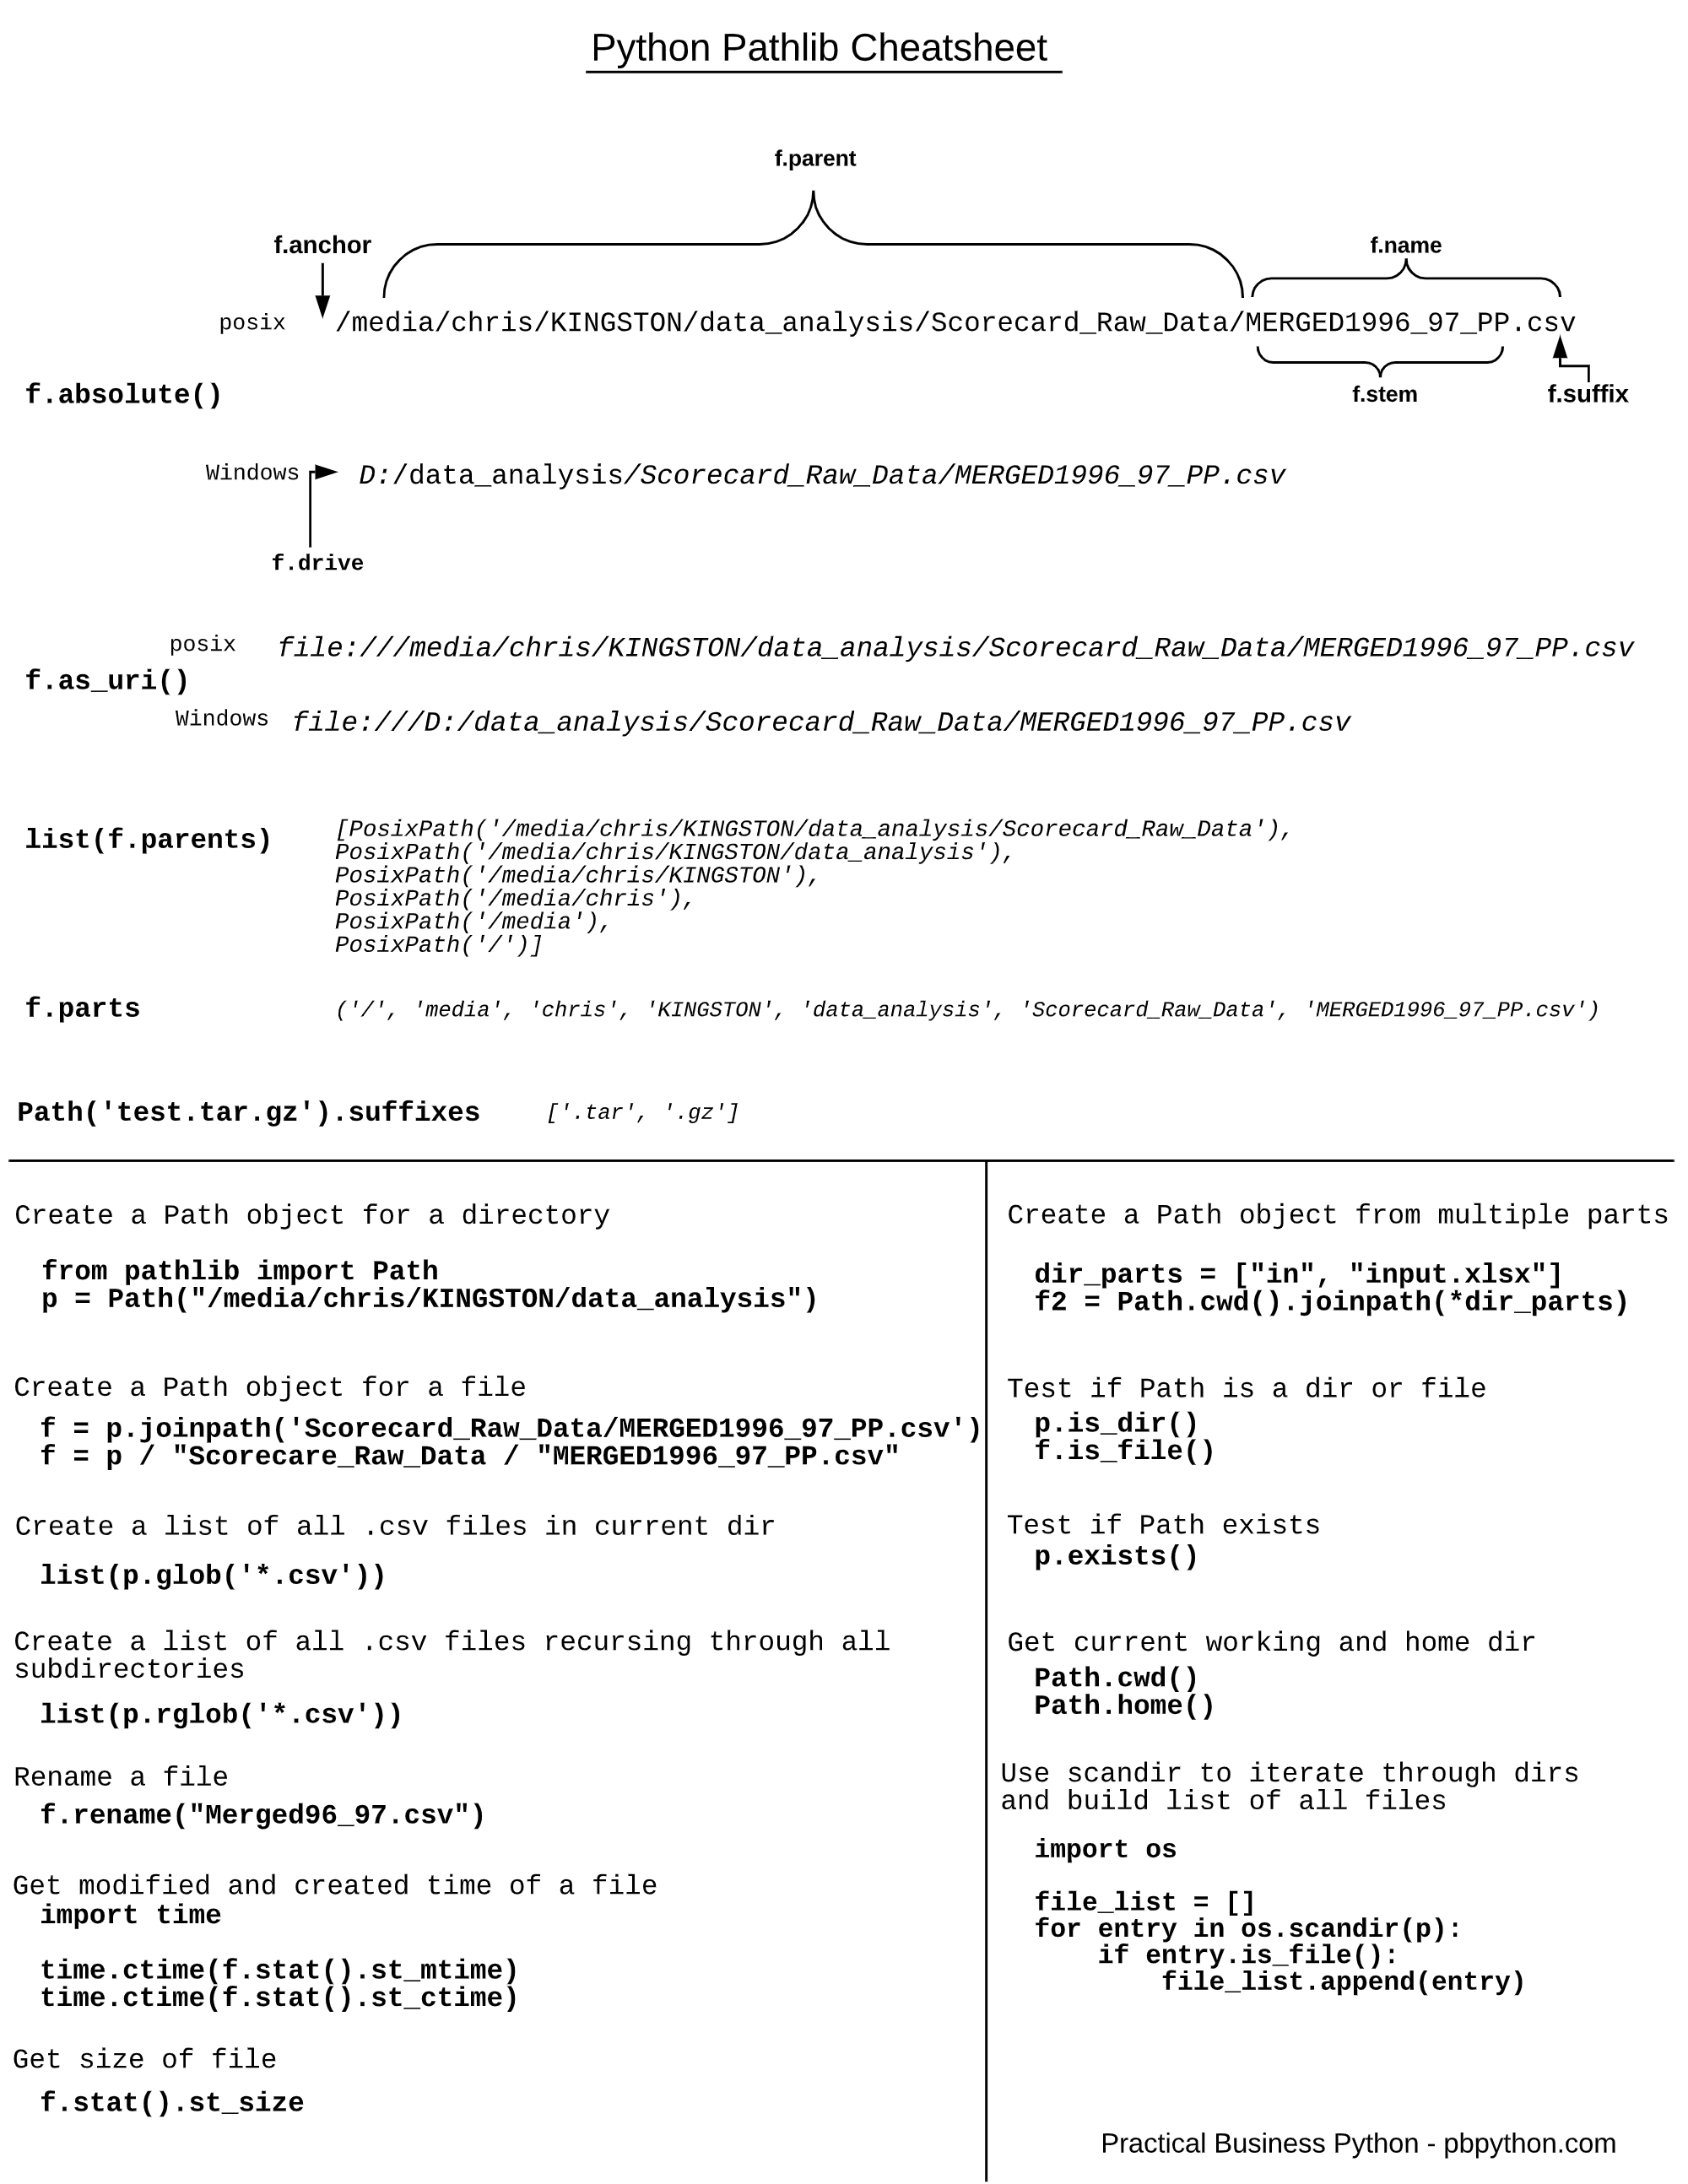

# Method Example

## Get path

### Get current workspace path

This path is not the real project path. It indicates where your program is running.(工作目录是在哪个目录下运行你的程序，不是项目目录。)

In [3]:
# return a path class

import pathlib

workspace = pathlib.Path.cwd()
print(workspace, type(workspace))

e:\git\learning\python <class 'pathlib.WindowsPath'>


### Get USER HOME
Return a path class object, you can get home path for current user.

In [5]:
from pathlib import Path

user_home = Path.home()
print(user_home, type(user_home))

C:\Users\Lenovo <class 'pathlib.WindowsPath'>


### Get a path of the file's location
Return a path of the file's location.

If it is running in a IDE, it will display the absolute path. But, it is running in CMD, it just get a relative path of current workspace. 
`pathlib.Path()` returns a relative path, if adds a  `resolve()` at the end.

So, you can use `resolve()` to transform it to a absolute path.

You will get error if it runs in jupyter.


In [8]:
import pathlib

file_path = pathlib.Path(__file__).resolve()
print(file_path, type(file_path))

NameError: name '__file__' is not defined

### Using `resolve()` to get a absolute path

In [13]:
import pathlib

the_path = pathlib.Path('test.py')
the_absolute_path = pathlib.Path('test.py').resolve()
print(the_path)
print(the_absolute_path)

test.py
E:\git\learning\python\test.py


### Get file state

You can fetch states of a file. It includes size, creating timestamp, modifying timestamp and so on.


In [17]:
import pathlib

file = pathlib.Path('test.py')

print(f'State of file: {file.stat()}')
print(f'Size is {file.stat().st_size}')
print(f'Creating time is {file.stat().st_ctime}')

State of file: os.stat_result(st_mode=33206, st_ino=76279718688606721, st_dev=3939315175, st_nlink=1, st_uid=0, st_gid=0, st_size=9403, st_atime=1732180564, st_mtime=1732180563, st_ctime=1720693348)
Size is 9403
Creating time is 1720693348.9898853


In [28]:
# find the last modify file
import pathlib

# catch parent path of the file
file_path = pathlib.Path('test.py').resolve().parent

# get max modify timestamp
files_modify_timestamp = max((i.stat().st_mtime, i) for i in file_path.iterdir() if i.is_file())
print(files_modify_timestamp)

# get max modify timestamp
# files = []
# for i in file_path.iterdir():
#     if i.is_file():
#         files.append((i.stat().st_mtime, i))
# print(max(files))


(1732186741.6978862, WindowsPath('E:/git/learning/python/About_path.ipynb'))


## Find each part of a path

if a file path is `E:/git/a.txt'`
1. `.name` : file name (includes file suffix), e.g, `a.txt`. If the target item is a folder, then returns the folder name.
2. `.stem` : file name (excludes file suffix), e.g, `a`.
3. `.suffix` : file extension, e.g, `txt`.
4. `.parent` : parent folder, e.g, `E:/git/`, equal to `cd ..`.
5. `.anchor`: an anchor of a path, e.g, `E:/` or `/`.



In [29]:
import pathlib

file_path = pathlib.Path('test.py').resolve()

print(f'File path is : {file_path}')
print(f'File whole name is : {file_path.name}')
print(f'File name is : {file_path.stem}')
print(f'File suffix is : {file_path.suffix}')
print(f'Parent path is : {file_path.parent}')
print(f'Anchor is : {file_path.anchor}')

File path is : E:\git\learning\python\test.py
File whole name is : test.py
File name is : test
File suffix is : .py
Parent path is : E:\git\learning\python
Anchor is : E:\


### Fetch parent paths

Save in a list.

In [32]:
import pathlib

the_file = pathlib.Path('test.py').resolve()
parents_path = the_file.parents
print(f'All the parent path: {list(parents_path)}')

All the parent path: [WindowsPath('E:/git/learning/python'), WindowsPath('E:/git/learning'), WindowsPath('E:/git'), WindowsPath('E:/')]


### Walking child paths

You can use `file_path.iterdir()` to scan child paths.

You can use `is_dir()` and `is_file()` to determine if target item is file or folder.

In [1]:
import pathlib

# fetch current workspace
which_path = pathlib.Path.cwd()
print(f'Workspace is : {which_path}')

# get all items under the current workspace
path_contents = [i for i in which_path.iterdir()]
print(f'Workspace includes : {path_contents}')

# pick up folders
folders  = [i for i in which_path.iterdir() if i.is_dir()]
print(f'Workspace includes folders : {folders}')

# pick up files
files = [i for i in which_path.iterdir() if i.is_file()]
print(f'workspace includes files: {files}')


Workspace is : e:\git\learning\python
Workspace includes : [WindowsPath('e:/git/learning/python/.vscode'), WindowsPath('e:/git/learning/python/assert.ipynb'), WindowsPath('e:/git/learning/python/Asyncio.ipynb'), WindowsPath('e:/git/learning/python/CodeNote.ipynb'), WindowsPath('e:/git/learning/python/coding_test.ipynb'), WindowsPath('e:/git/learning/python/condition and loop.ipynb'), WindowsPath('e:/git/learning/python/context manager and while.ipynb'), WindowsPath('e:/git/learning/python/Coroutines.ipynb'), WindowsPath('e:/git/learning/python/CreateFunction.ipynb'), WindowsPath('e:/git/learning/python/Data sctructure of Python.ipynb'), WindowsPath('e:/git/learning/python/data.json'), WindowsPath('e:/git/learning/python/decorators.ipynb'), WindowsPath('e:/git/learning/python/EorroHanding.ipynb'), WindowsPath('e:/git/learning/python/error_message.csv'), WindowsPath('e:/git/learning/python/Futures.ipynb'), WindowsPath('e:/git/learning/python/garbage collection.ipynb'), WindowsPath('e:/gi

### Count extensions

1. Define target path, using `pathlib.Path()` to get a file relative path. Using `.parent` to get the parent path and using `resolve()` to transform it to a absolute path.
2. Using `iterdir()` to Walking each item under the path. And using `is_file()` to determine if it's a file.
3. If it's a file, then using `.suffix` to get extension of the file. And save them in a list.
4. Using `collections.Count()` to calculate numbers of each type of file.

In [12]:
import collections
import pathlib

target_path = pathlib.Path('test.py').resolve().parent
suffixs = [ i.suffix for i in target_path.iterdir() if i.is_file()]
collections.Counter(suffixs)

Counter({'.ipynb': 37,
         '.csv': 3,
         '.md': 2,
         '.txt': 2,
         '.json': 1,
         '.xlsx': 1,
         '.html': 1,
         '.py': 1})

### Fetch target objects in a directory

1. `glob()` : Just search in the next subdirectory.
2. `rglob()` : Can iterate search in subdirectory.

*You can use regular expression to search items*


In [28]:
# In this case, you can see that .parent should be wrote behind .resolve, only in this way, you can fetch the correct grandparent path.

import pathlib

target_path = pathlib.Path('test.py').resolve().parent.parent
wrong_parent_path = pathlib.Path('test.py').parent.parent.resolve() 
print(f'Right grandparent path is : {target_path}')
print(f'Wrong grandparent path is : {wrong_parent_path}')

# using keyword to fetch file directory in subpath
next_subpath_file = target_path.glob('*.txt')
iterate_subpath_file = target_path.rglob('*.txt')
print(list(next_subpath_file))
print(list(iterate_subpath_file))

# file name includes 'Python' and space and ends with '.ipynb'
files = target_path.rglob('Python *.ipynb')
print(list(files))

Right grandparent path is : E:\git\learning
Wrong grandparent path is : E:\git\learning\python
[]
[WindowsPath('E:/git/learning/python/out_readline.txt'), WindowsPath('E:/git/learning/python/test.txt'), WindowsPath('E:/git/learning/python/materials/ObjectOrientedProgramming_p2/1.txt'), WindowsPath('E:/git/learning/python/materials/ObjectOrientedProgramming_p2/2.txt'), WindowsPath('E:/git/learning/python/materials/ObjectOrientedProgramming_p2/3.txt'), WindowsPath('E:/git/learning/python/materials/ObjectOrientedProgramming_p2/4.txt'), WindowsPath('E:/git/learning/python/materials/ObjectOrientedProgramming_p2/5.txt')]
[WindowsPath('E:/git/learning/python/python GIL.ipynb'), WindowsPath('E:/git/learning/python/Python modularization.ipynb')]


### Determine if a path match the regulation


In [37]:
import pathlib

target_path = pathlib.Path('test.py').resolve().parent.parent
print(target_path)

print(target_path.match('*\git\*'))
print(target_path.match('*\g.*\*\*'))

E:\git\learning
True
False


### Combining paths

1. You can use `/` to combine paths.
2. Or you can use `joinpath()` to combine them together.

In [40]:
import pathlib

grandparent = pathlib.Path('test.py').resolve().parent.parent
print(f'Grandparent path is :{ grandparent}')

parent = 'Python'
child = 'test.py'

# combine grandparent, parent and child together
new_path = grandparent / parent / child
print(new_path)

new_path_2 = grandparent.joinpath(parent,child)
print(new_path_2)

Grandparent path is :E:\git\learning
E:\git\learning\Python\test.py
E:\git\learning\Python\test.py


## conditions

1. `.is_file()` :  if an item is a file.
2. `.is_dir()` :  if an item is a folder.
3. `.exists()`  : if item exists.

In [72]:
import pathlib
import pandas as pd

the_path = pathlib.Path.cwd()
items_info = []

for i in the_path.iterdir():
    items_info.append([i.parent, i.name, i.stat().st_ctime , i.is_file(), i.is_dir(), i.exists()])
    

cols = ['Parent', 'File_name', 'Create time', 'If file', 'If dir', 'exist']

file_info_dataframe = pd.DataFrame(items_info,columns=cols)
print(file_info_dataframe[:10])

                   Parent                        File_name   Create time  \
0  e:\git\learning\python                          .vscode  1.721116e+09   
1  e:\git\learning\python                     assert.ipynb  1.721125e+09   
2  e:\git\learning\python                    Asyncio.ipynb  1.720670e+09   
3  e:\git\learning\python                   CodeNote.ipynb  1.726220e+09   
4  e:\git\learning\python                coding_test.ipynb  1.725458e+09   
5  e:\git\learning\python         condition and loop.ipynb  1.693903e+09   
6  e:\git\learning\python  context manager and while.ipynb  1.721203e+09   
7  e:\git\learning\python                 Coroutines.ipynb  1.720442e+09   
8  e:\git\learning\python             CreateFunction.ipynb  1.694078e+09   
9  e:\git\learning\python  Data sctructure of Python.ipynb  1.692785e+09   

   If file  If dir  exist  
0    False    True   True  
1     True   False   True  
2     True   False   True  
3     True   False   True  
4     True   False   Tr

## File operation



### Create file

`file.touch(exist_ok)`: 
  1. `exist_ok = True`: In this setting, the process will ignore the exist error.
  2. `exist_ok = False` : If the file is existing in the directory, then it will raise an error.

In [ ]:
# First time to create the file
import pathlib

current_workspace = pathlib.Path.cwd()
print(f'The current workspace is :{current_workspace}')

file = pathlib.Path('hello.txt')
print(f'If the file {file} exists: {file.exists()}')

print(f'Start creating file')
file.touch(exist_ok=True)
print(f'Is the file {file} existing: {file.exists()}')


The current workspace is :e:\git\learning\python
If the file hello.txt exists: True
Start creating file
Is the file hello.txt existing: True


In [ ]:
# Second time to create the file, using exist_ok=True, it will ignore the exist error
import pathlib

current_workspace = pathlib.Path.cwd()
print(f'The current workspace is :{current_workspace}')

file = pathlib.Path('hello.txt')
print(f'If the file {file} exists: {file.exists()}')

print(f'Start creating file')
file.touch(exist_ok=True)
print(f'Is the file {file} existing: {file.exists()}')


The current workspace is :e:\git\learning\python
If the file hello.txt exists: True
Start creating file
Is the file hello.txt existing: True


In [ ]:
# create the file using exist_ok=False, it will get an error is the file is already existing.
import pathlib

current_workspace = pathlib.Path.cwd()
print(f'The current workspace is :{current_workspace}')

file = pathlib.Path('hello.txt')
print(f'If the file {file} exists: {file.exists()}')

print(f'Start creating file')
file.touch(exist_ok=False)
print(f'Is the file {file} existing: {file.exists()}')


The current workspace is :e:\git\learning\python
If the file hello.txt exists: True
Start creating file


FileExistsError: [Errno 17] File exists: 'hello.txt'

### Create a directory
 `mkdir()`: 
 1. `exist_ok`: the same as `touch()`.
 2. `parents` : If it setts to True, then you can create multiple levels of directories. Else, it just can create next level directory. And the directory must be empty.

In [40]:
import pathlib

current_workspace = pathlib.Path.cwd()
# create directory
new_path = current_workspace.joinpath('./test')
print(new_path)
new_path.mkdir(parents=False, exist_ok=True)
print(f'{new_path.exists()}')


# create multiple levels of directory
new_path_2 = current_workspace.joinpath('./test1/child/grandchild')
new_path_2.mkdir(parents=True)
print(f'{new_path_2.exists()}')

e:\git\learning\python\test
True
True


### Delete directory

`rmdir()`: It can delete one directory once, and it doesn't give any notice, so when you are deleting a directory, you must operate with great caution.

In [42]:
import pathlib

# delete the directory which just be created for test
print(new_path_2)
new_path_2.rmdir()
print(f'{new_path_2.exists()}')

new_path.rmdir()

e:\git\learning\python\test1\child\grandchild
False


### Delete a file

`unlink` ：It can delete a file.

In [38]:
import pathlib

file_path = pathlib.Path('hello.txt').resolve()
if file_path.exists():
    print(f'Deleting {file_path.name}')
    file_path.unlink()
    if not file_path.exists():
        print(f'Deleting succeed')

Deleting hello.txt
Deleting succeed


### Open a file

`open()`: Using `open()` to open a file. 

Using `with open() as f:` to automatic close the handle of opening the file.

In [45]:
import pathlib

file = pathlib.Path('test.txt').resolve()

with open(file, 'r') as f:
    contents = f.readlines()
    
print(contents)
    

['hello world']


In [57]:
import pathlib

file = pathlib.Path('test.txt').resolve()
with file.open('r') as f:
    contents = f.readlines()
    
print(contents)

['Hi']


You can use `pathlib` to directly operate file, without opening and closing the file.

Notice:
`file.write_text()` will cover items which are existing.

In [61]:
import pathlib

file = pathlib.Path('test.txt').resolve()

print(file.read_text())
print(file.read_bytes())

# it will cover the text which is existing in the file
file.write_text(data= 'Hi world hello', newline='\n')
print(file.read_text())

Hi world
b'Hi world'
Hi world hello


### Move file

`replace()`: Move or rename a file, OR BOTH OF THEM. 

The target folder must be existing, else it will raise an error.

In [62]:
import pathlib

file_path = pathlib.Path('test.yaml')

target_folder = pathlib.Path('./test')
target_folder.mkdir(exist_ok=True)

res = file_path.replace(target_folder/'hi.yaml')
print(res.exists())

True


### Rename a file

`rename()`: to rename a file


In [73]:
import pathlib

res = pathlib.Path('./test/hi.yaml').resolve()
print(res)

new_name = res.with_name('test.yaml')
res.rename(new_name)
print(res)


E:\git\learning\python\test\hi.yaml
E:\git\learning\python\test\hi.yaml
